<a href="https://colab.research.google.com/github/o480vt/2024MaPProject/blob/main/Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

In [ ]:
cd Mecab-ko-for-Google-Colab

In [ ]:
!bash install_mecab-ko_on_colab_light_220429.sh

In [ ]:
pip install kss

In [7]:
import numpy as np
import pandas as pd
from konlpy.tag import Mecab
mecab = Mecab()
print('패키지 설치 완료.')

패키지 설치 완료.


In [12]:
cases_file = '/content/cases.xlsx'
cases_df = pd.read_excel(cases_file)
totalcases=cases_df['이유'].values.tolist()
cases1960 = cases_df[cases_df['시대'] == 1960]['이유'].values.tolist()
cases1970 = cases_df[cases_df['시대'] == 1970]['이유'].values.tolist()
cases1980 = cases_df[cases_df['시대'] == 1980]['이유'].values.tolist()
cases1990 = cases_df[cases_df['시대'] == 1990]['이유'].values.tolist()
cases2000 = cases_df[cases_df['시대'] == 2000]['이유'].values.tolist()
cases2010 = cases_df[cases_df['시대'] == 2010]['이유'].values.tolist()
totaltext = ' '.join(totalcases)
text1960 = ' '.join(cases1960)
text1970 = ' '.join(cases1970)
text1980 = ' '.join(cases1980)
text1990 = ' '.join(cases1990)
text2000 = ' '.join(cases2000)
text2010 = ' '.join(cases2010)


print('판결문 텍스트 정보 전처리(리스트화) 완료.')
print('1960년 판례 건수: ',len(cases1960))
print('1970년 판례 건수: ',len(cases1970))
print('1980년 판례 건수: ',len(cases1980))
print('1990년 판례 건수: ',len(cases1990))
print('2000년 판례 건수: ',len(cases2000))
print('1910년 판례 건수: ',len(cases2010))
print('전체 텍스트 길이: ',len(totaltext))
print('1960년 텍스트 길이: ',len(text1960))
print('1970년 텍스트 길이: ',len(text1970))
print('1980년 텍스트 길이: ',len(text1980))
print('1990년 텍스트 길이: ',len(text1990))
print('2000년 텍스트 길이: ',len(text2000))
print('2010년 텍스트 길이: ',len(text2010))

판결문 텍스트 정보 전처리(리스트화) 완료.
1960년 판례 건수:  89
1970년 판례 건수:  61
1980년 판례 건수:  80
1990년 판례 건수:  133
2000년 판례 건수:  50
1910년 판례 건수:  111
전체 텍스트 길이:  1075686
1960년 텍스트 길이:  120619
1970년 텍스트 길이:  74883
1980년 텍스트 길이:  126914
1990년 텍스트 길이:  254531
2000년 텍스트 길이:  146352
2010년 텍스트 길이:  352382


In [13]:
def truncate_string(input_string, max_length):
    if len(input_string) > max_length:
        return input_string[:max_length]
    return input_string

max_length = 70000

trimmed_text1960 = truncate_string(text1960, max_length)
trimmed_text1970 = truncate_string(text1970, max_length)
trimmed_text1980 = truncate_string(text1980, max_length)
trimmed_text1990 = truncate_string(text1990, max_length)
trimmed_text2000 = truncate_string(text2000, max_length)
trimmed_text2010 = truncate_string(text2010, max_length)
trimmed_totaltext = trimmed_text1960 + trimmed_text1970 + trimmed_text1980 + trimmed_text1990 + trimmed_text2000 + trimmed_text2010

print(len(trimmed_text1960))
print(len(trimmed_text1970))
print(len(trimmed_text1980))
print(len(trimmed_text1990))
print(len(trimmed_text2000))
print(len(trimmed_text2010))
print(len(trimmed_totaltext))


70000
70000
70000
70000
70000
70000
420000


In [16]:
import kss

sentences1960 = kss.split_sentences(truncate_string(text1960, 49000))
sentences1970 = kss.split_sentences(truncate_string(text1970, 49000))
sentences1980 = kss.split_sentences(truncate_string(text1980, 49000))
sentences1990 = kss.split_sentences(truncate_string(text1990, 49000))
sentences2000 = kss.split_sentences(truncate_string(text2000, 49000))
sentences2010 = kss.split_sentences(truncate_string(text2010, 49000))
length1960=[]
length1970=[]
length1980=[]
length1990=[]
length2000=[]
length2010=[]

for i in range(len(sentences1960)):
  length1960.append(len(sentences1960[i]))
for i in range(len(sentences1970)):
  length1970.append(len(sentences1970[i]))
for i in range(len(sentences1980)):
  length1980.append(len(sentences1980[i]))
for i in range(len(sentences1990)):
  length1990.append(len(sentences1990[i]))
for i in range(len(sentences2000)):
  length2000.append(len(sentences2000[i]))
for i in range(len(sentences2010)):
  length2010.append(len(sentences2010[i]))

from scipy import stats

print('문장 길이 분포가 정규성을 가지는지 검정.')
shapiro_stat_1960, shapiro_p_value_1960 = stats.shapiro(length1960)
shapiro_stat_1970, shapiro_p_value_1970 = stats.shapiro(length1970)
shapiro_stat_1980, shapiro_p_value_1980 = stats.shapiro(length1980)
shapiro_stat_1990, shapiro_p_value_1990 = stats.shapiro(length1990)
shapiro_stat_2999, shapiro_p_value_2000 = stats.shapiro(length2000)
shapiro_stat_2010, shapiro_p_value_2010 = stats.shapiro(length2010)

if shapiro_p_value_1960 < 0.04 and shapiro_p_value_1970 < 0.04 and shapiro_p_value_1980 < 0.04 and shapiro_p_value_1990 < 0.04 and shapiro_p_value_2000 < 0.04 and shapiro_p_value_2010 < 0.04:
  print("모든 년도에 대해 Shapiro-Wilk Test를 수행한 결과, 문장 길이의의 분포의 P-Value는 0.04 이하이므로, 모든 년도가 정규성을 만족하므로 Bartlett's Test를 수행한다.\n")
else:
  print("모든 년도에 대해 Shapiro-Wilk Test를 수행한 결과, 정규성을 가지지 않는 년도가 존재한다. 따라서 Fligner-Killeen test를 수행한다.\n")

bartlett_stat, bartlett_p_value = stats.bartlett(length1960, length1970)

print('문장 길이 분포가 균등한지(분산에 유의미한 차이가 있는지) 검정.')
print("Bartlett's Test Statistic:", bartlett_stat)
print("Bartlett's Test P-Value:", bartlett_p_value)

if bartlett_p_value < 0.5:
    print("문장 길이에 대해 분산 차이가 유의미하게 있다.")
else:
    print("모든 년도에 대해 문장 길이는 균등하다고 보아도 좋다.")


문장 길이 분포가 정규성을 가지는지 검정.
모든 년도에 대해 Shapiro-Wilk Test를 수행한 결과, 문장 길이의의 분포의 P-Value는 0.04 이하이므로, 모든 년도가 정규성을 만족하므로 Bartlett's Test를 수행한다.

문장 길이 분포가 균등한지(분산에 유의미한 차이가 있는지) 검정.
Bartlett's Test Statistic: 4.538258343067401
Bartlett's Test P-Value: 0.03314529950209816
문장 길이에 대해 분산 차이가 유의미하게 있다.


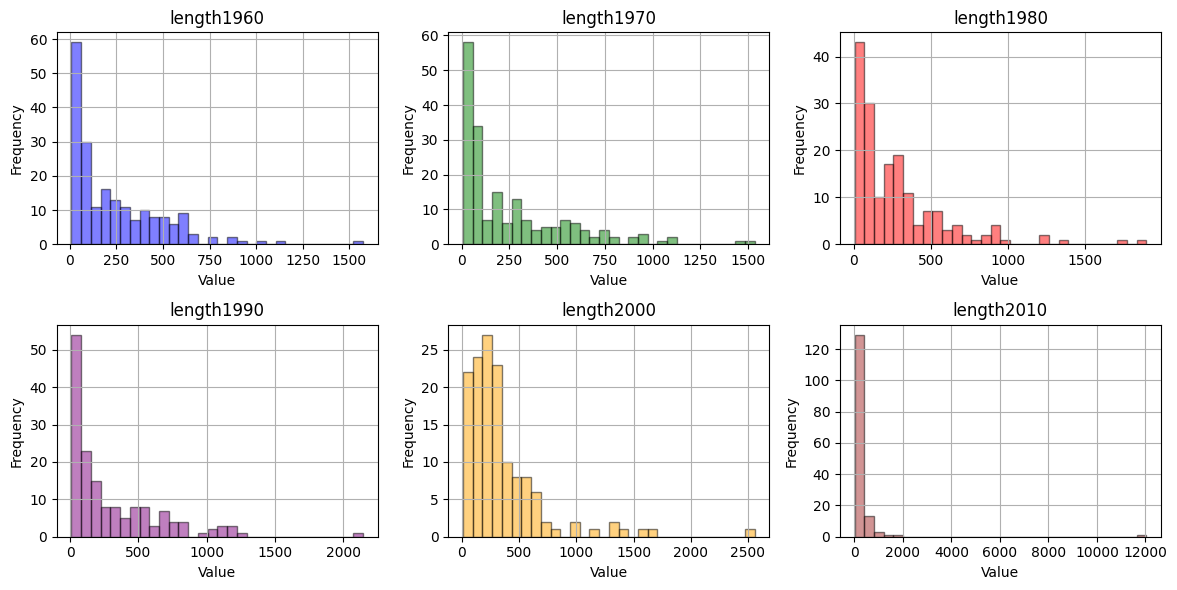

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

axs[0, 0].hist(length1960, bins=30, alpha=0.5, color='blue', edgecolor='black')
axs[0, 0].set_title('length1960')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(True)

axs[0, 1].hist(length1970, bins=30, alpha=0.5, color='green', edgecolor='black')
axs[0, 1].set_title('length1970')
axs[0, 1].set_xlabel('Value')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(True)

axs[0, 2].hist(length1980, bins=30, alpha=0.5, color='red', edgecolor='black')
axs[0, 2].set_title('length1980')
axs[0, 2].set_xlabel('Value')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].grid(True)

axs[1, 0].hist(length1990, bins=30, alpha=0.5, color='purple', edgecolor='black')
axs[1, 0].set_title('length1990')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

axs[1, 1].hist(length2000, bins=30, alpha=0.5, color='orange', edgecolor='black')
axs[1, 1].set_title('length2000')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

axs[1, 2].hist(length2010, bins=30, alpha=0.5, color='brown', edgecolor='black')
axs[1, 2].set_title('length2010')
axs[1, 2].set_xlabel('Value')
axs[1, 2].set_ylabel('Frequency')
axs[1, 2].grid(True)

plt.tight_layout()
plt.show()

In [18]:
totaltagger = mecab.pos(trimmed_totaltext)

T=[]
S=[]
O=[]
V=[]

for i in range(len(totaltagger)):
    T.append(totaltagger[i][0])
while '.' in T:
    T.remove('.')
while '(' in T:
    T.remove('(')
while ')' in T:
    T.remove(')')

for i in range(len(totaltagger)):
  if totaltagger[i-1][1] == 'SSC' and ((totaltagger[i][0] == '는' and totaltagger[i][1] == 'JX') or (totaltagger[i][0] == '은' and totaltagger[i][1] == 'JX')):
    S.append(totaltagger[i-2][0])
  elif (totaltagger[i][0] == '는' and totaltagger[i][1] == 'JX') or (totaltagger[i][0] == '은' and totaltagger[i][1] == 'JX'):
    S.append(totaltagger[i-1][0])

for i in range(len(totaltagger)):
  if totaltagger[i][1] == 'JKO':
    O.append(totaltagger[i-1][0])

for i in range(len(totaltagger)):
  if (totaltagger[i-2][1] == 'NNB' and totaltagger[i-1][1] == 'VCP' and totaltagger[i][1] == 'EF'):
    V.append(totaltagger[i-3][0])
  elif (totaltagger[i-1][1] == 'VCP' and totaltagger[i][1] == 'EF'):
    V.append(totaltagger[i-2][0])
  elif totaltagger[i][1] == 'EF':
    V.append(totaltagger[i-1][0])
  if totaltagger[i][1] == 'XSV+EF':
    V.append(totaltagger[i-1][0])
  if totaltagger[i][1] == 'VV+EF' or totaltagger[i][1] == 'VA+EF' or totaltagger[i][1] == 'VX+EF':
    V.append(totaltagger[i][0])

print('격틀별 어휘 토큰화 및 선별 완료.')
print('전체 어휘: ',T[0:10],'등 총',len(T),'건')
print('주제격 자리에서 출현하는 어휘: ',S[0:10],'등 총',len(S),'건')
print('목적격 자리에서 출현하는 어휘: ',O[0:10],'등 총',len(O),'건')
print('술부 자리에서 출현하는 어휘: ',V[0:10],'등 총',len(V),'건')

격틀별 어휘 토큰화 및 선별 완료.
전체 어휘:  ['피', '고', '소송', '수행자', '의', '상고', '이유', '에', '대한', '판단'] 등 총 198620 건
주제격 자리에서 출현하는 어휘:  ['수', '원고', '주장', '조치', '상고', '소송비용', '상속인', '법의', '함', '원심'] 등 총 4137 건
목적격 자리에서 출현하는 어휘:  ['부상', '수당금', '돈', '이것', '보상금', '음', '포기', '기간', '포기', '유여'] 등 총 7053 건
술부 자리에서 출현하는 어휘:  ['없', '판결', '할', '없', '없', '없', '판결', '본다', '있', '못할'] 등 총 1535 건


In [19]:
from collections import Counter

PropT=[]
PropS=[]
PropO=[]
PropV=[]

word_counts = Counter(T)
T_frequency_list = [(item, count) for item, count in word_counts.items()]
print('전체 어휘 카운팅',T_frequency_list[0:5],'등 총',len(T_frequency_list),'건')

word_counts = Counter(S)
S_frequency_list = [(item, count) for item, count in word_counts.items()]
print('주제어 카운팅',S_frequency_list[0:5],'등 총',len(S_frequency_list),'건')

word_counts = Counter(O)
O_frequency_list = [(item, count) for item, count in word_counts.items()]
print('목적어 카운팅',O_frequency_list[0:5],'등 총',len(O_frequency_list),'건')

word_counts = Counter(V)
V_frequency_list = [(item, count) for item, count in word_counts.items()]
print('술어 카운팅',V_frequency_list[0:5],'등 총',len(V_frequency_list),'건')

for i in range(len(T_frequency_list)):
  p = round(T_frequency_list[i][1]/len(T),6)
  PropT.append((T_frequency_list[i][0],p))
print('전체 어휘의 확률분포:', PropT[0:10])

for i in range(len(S_frequency_list)):
  p = round(S_frequency_list[i][1]/len(S),6)
  PropS.append((S_frequency_list[i][0],p))
print('주제 자리 어휘의 확률분포:', PropS[0:10])

for i in range(len(O_frequency_list)):
  p = round(O_frequency_list[i][1]/len(O),6)
  PropO.append((O_frequency_list[i][0],p))
print('목적격 자리 어휘의 확률분포:',PropO[0:10])

for i in range(len(V_frequency_list)):
  p = round(V_frequency_list[i][1]/len(V),6)
  PropV.append((V_frequency_list[i][0],p))
print('술부 자리 어휘의 확률분포:', PropV[0:10])

전체 어휘 카운팅 [('피', 636), ('고', 2975), ('소송', 211), ('수행자', 18), ('의', 7186)] 등 총 7033 건
주제어 카운팅 [('수', 50), ('원고', 136), ('주장', 51), ('조치', 26), ('상고', 35)] 등 총 610 건
목적어 카운팅 [('부상', 1), ('수당금', 1), ('돈', 6), ('이것', 8), ('보상금', 1)] 등 총 1166 건
술어 카운팅 [('없', 344), ('판결', 176), ('할', 168), ('본다', 74), ('있', 150)] 등 총 105 건
전체 어휘의 확률분포: [('피', 0.003202), ('고', 0.014978), ('소송', 0.001062), ('수행자', 9.1e-05), ('의', 0.03618), ('상고', 0.004259), ('이유', 0.006319), ('에', 0.032675), ('대한', 0.002678), ('판단', 0.00363)]
주제 자리 어휘의 확률분포: [('수', 0.012086), ('원고', 0.032874), ('주장', 0.012328), ('조치', 0.006285), ('상고', 0.00846), ('소송비용', 0.006768), ('상속인', 0.000967), ('법의', 0.000242), ('함', 0.00846), ('원심', 0.058013)]
목적격 자리 어휘의 확률분포: [('부상', 0.000142), ('수당금', 0.000142), ('돈', 0.000851), ('이것', 0.001134), ('보상금', 0.000142), ('음', 0.011484), ('포기', 0.000425), ('기간', 0.003686), ('유여', 0.000142), ('발생', 0.000709)]
술부 자리 어휘의 확률분포: [('없', 0.224104), ('판결', 0.114658), ('할', 0.109446), ('본다', 0.048208), ('있', 0.097

In [33]:
import pandas as pd

df_T = pd.DataFrame(PropT, columns=['Word', 'Frequency'])
df_S = pd.DataFrame(PropS, columns=['Word', 'Frequency'])
df_O = pd.DataFrame(PropO, columns=['Word', 'Frequency'])
df_V = pd.DataFrame(PropV, columns=['Word', 'Frequency'])

df_T.to_excel('/content/drive/MyDrive/Colab Notebooks/PropT.xlsx', index=False)
df_S.to_excel('/content/drive/MyDrive/Colab Notebooks/PropS.xlsx', index=False)
df_O.to_excel('/content/drive/MyDrive/Colab Notebooks/PropO.xlsx', index=False)
df_V.to_excel('/content/drive/MyDrive/Colab Notebooks/PropV.xlsx', index=False)

print("빈도정보 엑셀 내보내기 완료.")

빈도정보 엑셀 내보내기 완료.


In [34]:
tagger1960 = mecab.pos(trimmed_text1960)

probabilities=[]
for i in range(len(tagger1960)):
  for j in range(len(PropT)):
      if PropT[j][0] == tagger1960[i][0]:
        probabilities.append(PropT[j][1])
entropy1960 = -sum(p * np.log2(p) for p in probabilities if p > 0)
print('1960년대의 전체 엔트로피: ',entropy1960)

probabilities=[]
for i in range(len(tagger1960)):
  if tagger1960[i-1][1] == 'SSC' and ((tagger1960[i][0] == '는' and tagger1960[i][1] == 'JX') or (tagger1960[i][0] == '은' and tagger1960[i][1] == 'JX')):
    for j in range(len(PropS)):
      if PropS[j][0] == tagger1960[i-2][0]:
        probabilities.append(PropS[j][1])
  elif (tagger1960[i][0] == '는' and tagger1960[i][1] == 'JX') or (tagger1960[i][0] == '은' and tagger1960[i][1] == 'JX'):
    for j in range(len(PropS)):
      if PropS[j][0] == tagger1960[i-1][0]:
        probabilities.append(PropS[j][1])
S_entropy1960 = -sum(p * np.log2(p) for p in probabilities)
print('1960년대의 주제어 엔트로피: ',S_entropy1960)

probabilities=[]
for i in range(len(tagger1960)):
  if tagger1960[i][1] == 'JKO':
    for j in range(len(PropO)):
      if PropO[j][0] == tagger1960[i-1][0]:
        probabilities.append(PropO[j][1])
O_entropy1960 = -sum(p * np.log2(p) for p in probabilities)
print('1960년대의 목적어 엔트로피: ',O_entropy1960)

probabilities=[]
for i in range(len(tagger1960)):
  if (tagger1960[i-2][1] == 'NNB' and tagger1960[i-1][1] == 'VCP' and tagger1960[i][1] == 'EF'):
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1960[i-3][0]:
        probabilities.append(PropV[j][1])
  elif (tagger1960[i-1][1] == 'VCP' and tagger1960[i][1] == 'EF'):
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1960[i-2][0]:
        probabilities.append(PropV[j][1])
  elif tagger1960[i][1] == 'EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1960[i-1][0]:
        probabilities.append(PropV[j][1])
  if tagger1960[i][1] == 'XSV+EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1960[i-1][0]:
        probabilities.append(PropV[j][1])
  if tagger1960[i][1] == 'VV+EF' or tagger1960[i][1] == 'VA+EF' or tagger1960[i][1] == 'VX+EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1960[i][0]:
        probabilities.append(PropV[j][1])
V_entropy1960 = -sum(p * np.log2(p) for p in probabilities)
print('1960년대의 술어 엔트로피: ',V_entropy1960)

1960년대의 전체 엔트로피:  1768.0599521738764
1960년대의 주제어 엔트로피:  85.02432453820575
1960년대의 목적어 엔트로피:  55.29333324227508
1960년대의 술어 엔트로피:  88.1783268942085


In [35]:
tagger1970 = mecab.pos(trimmed_text1970)

probabilities=[]
for i in range(len(tagger1970)):
  for j in range(len(PropT)):
      if PropT[j][0] == tagger1970[i][0]:
        probabilities.append(PropT[j][1])
entropy1970 = -sum(p * np.log2(p) for p in probabilities if p > 0)
print('1970년대의 전체 엔트로피: ',entropy1970)

probabilities=[]
for i in range(len(tagger1970)):
  if tagger1970[i-1][1] == 'SSC' and ((tagger1970[i][0] == '는' and tagger1970[i][1] == 'JX') or (tagger1970[i][0] == '은' and tagger1970[i][1] == 'JX')):
    for j in range(len(PropS)):
      if PropS[j][0] == tagger1970[i-2][0]:
        probabilities.append(PropS[j][1])
  elif (tagger1970[i][0] == '는' and tagger1970[i][1] == 'JX') or (tagger1970[i][0] == '은' and tagger1970[i][1] == 'JX'):
    for j in range(len(PropS)):
      if PropS[j][0] == tagger1970[i-1][0]:
        probabilities.append(PropS[j][1])
S_entropy1970 = -sum(p * np.log2(p) for p in probabilities)
print('1970년대의 주제어 엔트로피: ',S_entropy1970)

probabilities=[]
for i in range(len(tagger1970)):
  if tagger1970[i][1] == 'JKO':
    for j in range(len(PropO)):
      if PropO[j][0] == tagger1970[i-1][0]:
        probabilities.append(PropO[j][1])
O_entropy1970 = -sum(p * np.log2(p) for p in probabilities)
print('1970년대의 목적어 엔트로피: ',O_entropy1970)

probabilities=[]
for i in range(len(tagger1970)):
  if (tagger1970[i-2][1] == 'NNB' and tagger1970[i-1][1] == 'VCP' and tagger1970[i][1] == 'EF'):
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1970[i-3][0]:
        probabilities.append(PropV[j][1])
  elif (tagger1970[i-1][1] == 'VCP' and tagger1970[i][1] == 'EF'):
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1970[i-2][0]:
        probabilities.append(PropV[j][1])
  elif tagger1970[i][1] == 'EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1970[i-1][0]:
        probabilities.append(PropV[j][1])
  if tagger1970[i][1] == 'XSV+EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1970[i-1][0]:
        probabilities.append(PropV[j][1])
  if tagger1970[i][1] == 'VV+EF' or tagger1970[i][1] == 'VA+EF' or tagger1970[i][1] == 'VX+EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1970[i][0]:
        probabilities.append(PropV[j][1])
V_entropy1970 = -sum(p * np.log2(p) for p in probabilities)
print('1970년대의 술어 엔트로피: ',V_entropy1970)

1970년대의 전체 엔트로피:  1753.4284560560484
1970년대의 주제어 엔트로피:  82.3312474033558
1970년대의 목적어 엔트로피:  60.0771187006228
1970년대의 술어 엔트로피:  88.32774612450808


In [42]:
tagger1980 = mecab.pos(trimmed_text1980)

probabilities=[]
for i in range(len(tagger1980)):
  for j in range(len(PropT)):
      if PropT[j][0] == tagger1980[i][0]:
        probabilities.append(PropT[j][1])
entropy1980 = -sum(p * np.log2(p) for p in probabilities if p > 0)
print('1980년대의 전체 엔트로피: ',entropy1980)

probabilities=[]
for i in range(len(tagger1980)):
  if tagger1980[i-1][1] == 'SSC' and ((tagger1980[i][0] == '는' and tagger1980[i][1] == 'JX') or (tagger1980[i][0] == '은' and tagger1980[i][1] == 'JX')):
    for j in range(len(PropS)):
      if PropS[j][0] == tagger1980[i-2][0]:
        probabilities.append(PropS[j][1])
  elif (tagger1980[i][0] == '는' and tagger1980[i][1] == 'JX') or (tagger1980[i][0] == '은' and tagger1980[i][1] == 'JX'):
    for j in range(len(PropS)):
      if PropS[j][0] == tagger1980[i-1][0]:
        probabilities.append(PropS[j][1])
S_entropy1980 = -sum(p * np.log2(p) for p in probabilities)
print('1980년대의 주제어 엔트로피: ',S_entropy1980)

probabilities=[]
for i in range(len(tagger1980)):
  if tagger1980[i][1] == 'JKO':
    for j in range(len(PropO)):
      if PropO[j][0] == tagger1980[i-1][0]:
        probabilities.append(PropO[j][1])
O_entropy1980 = -sum(p * np.log2(p) for p in probabilities)
print('1980년대의 목적어 엔트로피: ',O_entropy1980)

probabilities=[]
for i in range(len(tagger1980)):
  if (tagger1980[i-2][1] == 'NNB' and tagger1980[i-1][1] == 'VCP' and tagger1980[i][1] == 'EF'):
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1980[i-3][0]:
        probabilities.append(PropV[j][1])
  elif (tagger1980[i-1][1] == 'VCP' and tagger1980[i][1] == 'EF'):
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1980[i-2][0]:
        probabilities.append(PropV[j][1])
  elif tagger1980[i][1] == 'EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1980[i-1][0]:
        probabilities.append(PropV[j][1])
  if tagger1980[i][1] == 'XSV+EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1980[i-1][0]:
        probabilities.append(PropV[j][1])
  if tagger1980[i][1] == 'VV+EF' or tagger1980[i][1] == 'VA+EF' or tagger1980[i][1] == 'VX+EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1980[i][0]:
        probabilities.append(PropV[j][1])
V_entropy1980 = -sum(p * np.log2(p) for p in probabilities)
print('1980년대의 술어 엔트로피: ',V_entropy1980)

1980년대의 전체 엔트로피:  1726.2173003455093
1980년대의 주제어 엔트로피:  71.47532270745086
1980년대의 목적어 엔트로피:  63.08317478083805
1980년대의 술어 엔트로피:  68.5674565063418


In [36]:
tagger1990 = mecab.pos(trimmed_text1990)

probabilities=[]
for i in range(len(tagger1990)):
  for j in range(len(PropT)):
      if PropT[j][0] == tagger1990[i][0]:
        probabilities.append(PropT[j][1])
entropy1990 = -sum(p * np.log2(p) for p in probabilities if p > 0)
print('1990년대의 전체 엔트로피: ',entropy1990)

probabilities=[]
for i in range(len(tagger1990)):
  if tagger1990[i-1][1] == 'SSC' and ((tagger1990[i][0] == '는' and tagger1990[i][1] == 'JX') or (tagger1990[i][0] == '은' and tagger1990[i][1] == 'JX')):
    for j in range(len(PropS)):
      if PropS[j][0] == tagger1990[i-2][0]:
        probabilities.append(PropS[j][1])
  elif (tagger1990[i][0] == '는' and tagger1990[i][1] == 'JX') or (tagger1990[i][0] == '은' and tagger1990[i][1] == 'JX'):
    for j in range(len(PropS)):
      if PropS[j][0] == tagger1990[i-1][0]:
        probabilities.append(PropS[j][1])
S_entropy1990 = -sum(p * np.log2(p) for p in probabilities)
print('1990년대의 주제어 엔트로피: ',S_entropy1990)

probabilities=[]
for i in range(len(tagger1990)):
  if tagger1990[i][1] == 'JKO':
    for j in range(len(PropO)):
      if PropO[j][0] == tagger1990[i-1][0]:
        probabilities.append(PropO[j][1])
O_entropy1990 = -sum(p * np.log2(p) for p in probabilities)
print('1990년대의 목적어 엔트로피: ',O_entropy1990)

probabilities=[]
for i in range(len(tagger1990)):
  if (tagger1990[i-2][1] == 'NNB' and tagger1990[i-1][1] == 'VCP' and tagger1990[i][1] == 'EF'):
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1990[i-3][0]:
        probabilities.append(PropV[j][1])
  elif (tagger1990[i-1][1] == 'VCP' and tagger1990[i][1] == 'EF'):
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1990[i-2][0]:
        probabilities.append(PropV[j][1])
  elif tagger1990[i][1] == 'EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1990[i-1][0]:
        probabilities.append(PropV[j][1])
  if tagger1990[i][1] == 'XSV+EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1990[i-1][0]:
        probabilities.append(PropV[j][1])
  if tagger1990[i][1] == 'VV+EF' or tagger1990[i][1] == 'VA+EF' or tagger1990[i][1] == 'VX+EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger1990[i][0]:
        probabilities.append(PropV[j][1])
V_entropy1990 = -sum(p * np.log2(p) for p in probabilities)
print('1990년대의 술어 엔트로피: ',V_entropy1990)

1990년대의 전체 엔트로피:  1751.7039636833563
1990년대의 주제어 엔트로피:  70.56488106799807
1990년대의 목적어 엔트로피:  59.39898260650625
1990년대의 술어 엔트로피:  70.8458384483341


In [37]:
tagger2000 = mecab.pos(trimmed_text2000)

probabilities=[]
for i in range(len(tagger2000)):
  for j in range(len(PropT)):
      if PropT[j][0] == tagger2000[i][0]:
        probabilities.append(PropT[j][1])
entropy2000 = -sum(p * np.log2(p) for p in probabilities if p > 0)
print('2000년대의 전체 엔트로피: ',entropy2000)

probabilities=[]
for i in range(len(tagger2000)):
  if tagger2000[i-1][1] == 'SSC' and ((tagger2000[i][0] == '는' and tagger2000[i][1] == 'JX') or (tagger2000[i][0] == '은' and tagger2000[i][1] == 'JX')):
    for j in range(len(PropS)):
      if PropS[j][0] == tagger2000[i-2][0]:
        probabilities.append(PropS[j][1])
  elif (tagger2000[i][0] == '는' and tagger2000[i][1] == 'JX') or (tagger2000[i][0] == '은' and tagger2000[i][1] == 'JX'):
    for j in range(len(PropS)):
      if PropS[j][0] == tagger2000[i-1][0]:
        probabilities.append(PropS[j][1])
S_entropy2000 = -sum(p * np.log2(p) for p in probabilities)
print('2000년대의 주제어 엔트로피: ',S_entropy2000)

probabilities=[]
for i in range(len(tagger2000)):
  if tagger2000[i][1] == 'JKO':
    for j in range(len(PropO)):
      if PropO[j][0] == tagger2000[i-1][0]:
        probabilities.append(PropO[j][1])
O_entropy2000 = -sum(p * np.log2(p) for p in probabilities)
print('2000년대의 목적어 엔트로피: ',O_entropy2000)

probabilities=[]
for i in range(len(tagger2000)):
  if (tagger2000[i-2][1] == 'NNB' and tagger2000[i-1][1] == 'VCP' and tagger2000[i][1] == 'EF'):
    for j in range(len(PropV)):
      if PropV[j][0] == tagger2000[i-3][0]:
        probabilities.append(PropV[j][1])
  elif (tagger2000[i-1][1] == 'VCP' and tagger2000[i][1] == 'EF'):
    for j in range(len(PropV)):
      if PropV[j][0] == tagger2000[i-2][0]:
        probabilities.append(PropV[j][1])
  elif tagger2000[i][1] == 'EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger2000[i-1][0]:
        probabilities.append(PropV[j][1])
  if tagger2000[i][1] == 'XSV+EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger2000[i-1][0]:
        probabilities.append(PropV[j][1])
  if tagger2000[i][1] == 'VV+EF' or tagger2000[i][1] == 'VA+EF' or tagger2000[i][1] == 'VX+EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger2000[i][0]:
        probabilities.append(PropV[j][1])
V_entropy2000 = -sum(p * np.log2(p) for p in probabilities)
print('2000년대의 술어 엔트로피: ',V_entropy2000)

2000년대의 전체 엔트로피:  1631.0066633597387
2000년대의 주제어 엔트로피:  65.57656249735682
2000년대의 목적어 엔트로피:  50.22306056287259
2000년대의 술어 엔트로피:  49.94136036095482


In [38]:
tagger2010 = mecab.pos(trimmed_text2010)

probabilities=[]
for i in range(len(tagger2010)):
  for j in range(len(PropT)):
      if PropT[j][0] == tagger2010[i][0]:
        probabilities.append(PropT[j][1])
entropy2010 = -sum(p * np.log2(p) for p in probabilities if p > 0)
print('2010년대의 전체 엔트로피: ',entropy2010)

probabilities=[]
for i in range(len(tagger2010)):
  if tagger2010[i-1][1] == 'SSC' and ((tagger2010[i][0] == '는' and tagger2010[i][1] == 'JX') or (tagger2010[i][0] == '은' and tagger2010[i][1] == 'JX')):
    for j in range(len(PropS)):
      if PropS[j][0] == tagger2010[i-2][0]:
        probabilities.append(PropS[j][1])
  elif (tagger2010[i][0] == '는' and tagger2010[i][1] == 'JX') or (tagger2010[i][0] == '은' and tagger2010[i][1] == 'JX'):
    for j in range(len(PropS)):
      if PropS[j][0] == tagger2010[i-1][0]:
        probabilities.append(PropS[j][1])
S_entropy2010 = -sum(p * np.log2(p) for p in probabilities)
print('2010년대의 주제어 엔트로피: ',S_entropy2010)

probabilities=[]
for i in range(len(tagger2010)):
  if tagger2010[i][1] == 'JKO':
    for j in range(len(PropO)):
      if PropO[j][0] == tagger2010[i-1][0]:
        probabilities.append(PropO[j][1])
O_entropy2010 = -sum(p * np.log2(p) for p in probabilities)
print('2010년대의 목적어 엔트로피: ',O_entropy2010)

probabilities=[]
for i in range(len(tagger2010)):
  if (tagger2010[i-2][1] == 'NNB' and tagger2010[i-1][1] == 'VCP' and tagger2010[i][1] == 'EF'):
    for j in range(len(PropV)):
      if PropV[j][0] == tagger2010[i-3][0]:
        probabilities.append(PropV[j][1])
  elif (tagger2010[i-1][1] == 'VCP' and tagger2010[i][1] == 'EF'):
    for j in range(len(PropV)):
      if PropV[j][0] == tagger2010[i-2][0]:
        probabilities.append(PropV[j][1])
  elif tagger2010[i][1] == 'EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger2010[i-1][0]:
        probabilities.append(PropV[j][1])
  if tagger2010[i][1] == 'XSV+EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger2010[i-1][0]:
        probabilities.append(PropV[j][1])
  if tagger2010[i][1] == 'VV+EF' or tagger2010[i][1] == 'VA+EF' or tagger2010[i][1] == 'VX+EF':
    for j in range(len(PropV)):
      if PropV[j][0] == tagger2010[i][0]:
        probabilities.append(PropV[j][1])
V_entropy2010 = -sum(p * np.log2(p) for p in probabilities)
print('2010년대의 술어 엔트로피: ',V_entropy2010)

2010년대의 전체 엔트로피:  1631.5302793525857
2010년대의 주제어 엔트로피:  58.78537839260175
2010년대의 목적어 엔트로피:  51.08116703838611
2010년대의 술어 엔트로피:  69.42160325098888


In [60]:
data = {
    'Decade': ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s'],
    'Total': [1768.0599521738764, 1753.4284560560484, 1726.2173003455093, 1751.7039636833563, 1631.0066633597387, 1631.5302793525857],
    'Subject': [85.02432453820575, 82.3312474033558, 71.47532270745086, 70.56488106799807, 65.57656249735682, 58.78537839260175],
    'Object': [55.29333324227508, 60.0771187006228, 63.08317478083805, 59.39898260650625, 50.22306056287259, 51.08116703838611],
    'Verb': [88.1783268942085, 88.32774612450808, 68.5674565063418, 70.8458384483341, 49.94136036095482, 69.42160325098888]
}

Entropy_Table = pd.DataFrame(data)
Entropy_Table.set_index('Decade', inplace=True)
print(Entropy_Table)

              Total    Subject     Object       Verb
Decade                                              
1960s   1768.059952  85.024325  55.293333  88.178327
1970s   1753.428456  82.331247  60.077119  88.327746
1980s   1726.217300  71.475323  63.083175  68.567457
1990s   1751.703964  70.564881  59.398983  70.845838
2000s   1631.006663  65.576562  50.223061  49.941360
2010s   1631.530279  58.785378  51.081167  69.421603


In [43]:
print('1960 주제어 상대엔트로피',round(S_entropy1960/entropy1960*100,4))
print('1960 목적어 상대엔트로피',round(O_entropy1960/entropy1960*100,3))
print('1960 술어 상대엔트로피',round(V_entropy1960/entropy1960*100,3))
print('1970 주제어 상대엔트로피',round(S_entropy1970/entropy1970*100,3))
print('1970 목적어 상대엔트로피',round(O_entropy1970/entropy1970*100,3))
print('1970 술어 상대엔트로피',round(V_entropy1970/entropy1970*100,3))
print('1980 주제어 상대엔트로피',round(S_entropy1980/entropy1980*100,3))
print('1980 목적어 상대엔트로피',round(O_entropy1980/entropy1980*100,3))
print('1980 술어 상대엔트로피',round(V_entropy1980/entropy1980*100,3))
print('1990 주제어 상대엔트로피',round(S_entropy1990/entropy1990*100,3))
print('1990 목적어 상대엔트로피',round(O_entropy1990/entropy1990*100,3))
print('1990 술어 상대엔트로피',round(V_entropy1990/entropy1990*100,3))
print('2000 주제어 상대엔트로피',round(S_entropy2000/entropy2000*100,3))
print('2000 목적어 상대엔트로피',round(O_entropy2000/entropy2000*100,3))
print('2000 술어 상대엔트로피',round(V_entropy2000/entropy2000*100,3))
print('2010 주제어 상대엔트로피',round(S_entropy2010/entropy2010*100,3))
print('2010 목적어 상대엔트로피',round(O_entropy2010/entropy2010*100,3))
print('2010 술어 상대엔트로피',round(V_entropy2010/entropy2010*100,3))

1960 주제어 상대엔트로피 4.8089
1960 목적어 상대엔트로피 3.127
1960 술어 상대엔트로피 4.987
1970 주제어 상대엔트로피 4.695
1970 목적어 상대엔트로피 3.426
1970 술어 상대엔트로피 5.037
1980 주제어 상대엔트로피 4.141
1980 목적어 상대엔트로피 3.654
1980 술어 상대엔트로피 3.972
1990 주제어 상대엔트로피 4.028
1990 목적어 상대엔트로피 3.391
1990 술어 상대엔트로피 4.044
2000 주제어 상대엔트로피 4.021
2000 목적어 상대엔트로피 3.079
2000 술어 상대엔트로피 3.062
2010 주제어 상대엔트로피 3.603
2010 목적어 상대엔트로피 3.131
2010 술어 상대엔트로피 4.255


In [45]:
print('1960 평균 상대엔트로피',round(((S_entropy1960+O_entropy1960+V_entropy1960)/entropy1960)*100,4))
print('1970 평균 상대엔트로피',round(((S_entropy1970+O_entropy1970+V_entropy1970)/entropy1970)*100,4))
print('1980 평균 상대엔트로피',round(((S_entropy1980+O_entropy1980+V_entropy1980)/entropy1980)*100,4))
print('1990 평균 상대엔트로피',round(((S_entropy1990+O_entropy1990+V_entropy1990)/entropy1990)*100,4))
print('2000 평균 상대엔트로피',round(((S_entropy2000+O_entropy2000+V_entropy2000)/entropy2000)*100,4))
print('2010 평균 상대엔트로피',round(((S_entropy2010+O_entropy2010+V_entropy2010)/entropy2010)*100,4))


1960 평균 상대엔트로피 12.9235
1970 평균 상대엔트로피 13.1591
1980 평균 상대엔트로피 11.7671
1990 평균 상대엔트로피 11.4637
2000 평균 상대엔트로피 10.1619
2010 평균 상대엔트로피 10.989


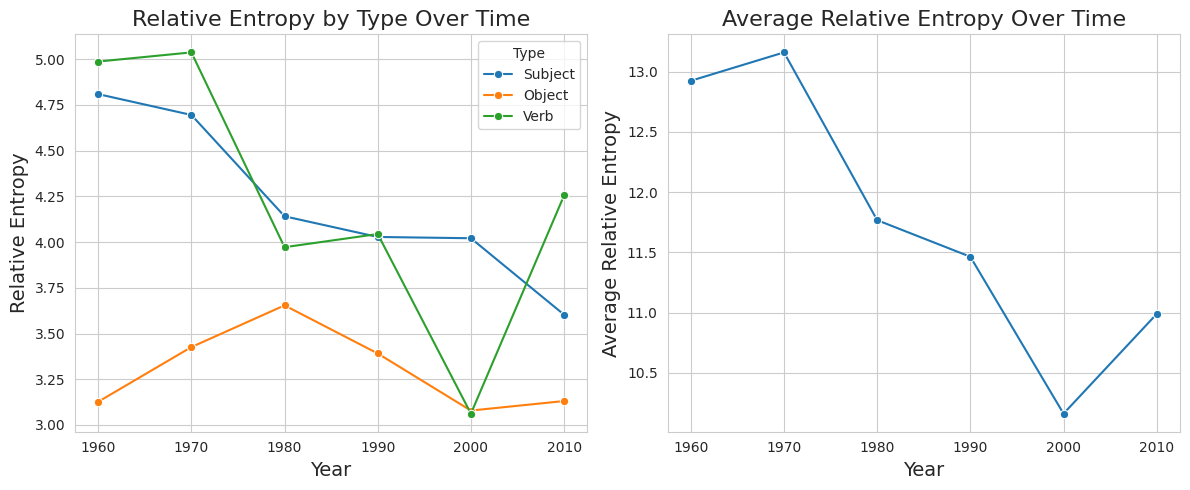

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data1 = {
    'Year': [1960, 1960, 1960, 1970, 1970, 1970, 1980, 1980, 1980, 1990, 1990, 1990, 2000, 2000, 2000, 2010, 2010, 2010],
    'Type': ['Subject', 'Object', 'Verb', 'Subject', 'Object', 'Verb', 'Subject', 'Object', 'Verb',
             'Subject', 'Object', 'Verb', 'Subject', 'Object', 'Verb', 'Subject', 'Object', 'Verb'],
    'RelativeEntropy': [4.8089, 3.127, 4.987, 4.695, 3.426, 5.037, 4.141, 3.654, 3.972, 4.028, 3.391, 4.044, 4.021, 3.079, 3.062, 3.603, 3.131, 4.255]
}

data2 = {
    'Year': [1960, 1970, 1980, 1990, 2000, 2010],
    'AverageRelativeEntropy': [12.9235, 13.1591, 11.7671, 11.4637, 10.1619, 10.989]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(ax=axes[0], data=df1, x='Year', y='RelativeEntropy', hue='Type', marker='o')
axes[0].set_title('Relative Entropy by Type Over Time', fontsize=16)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Relative Entropy', fontsize=14)
axes[0].legend(title='Type')

sns.lineplot(ax=axes[1], data=df2, x='Year', y='AverageRelativeEntropy', marker='o')
axes[1].set_title('Average Relative Entropy Over Time', fontsize=16)
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Average Relative Entropy', fontsize=14)

plt.tight_layout()
plt.show()